In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([5, 8, 3, ..., 1, 1, 6], dtype=int64)

In [6]:
def init_params():
    W1 = np.random.randn(10,784) - 0.5
    b1 = np.random.randn(10,1) - 0.5
    W2 = np.random.randn(10,10) - 0.5
    b2 = np.random.randn(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def backward_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ2.dot(X.T)
    db1 = 1 / m * np.sum(dZ2)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1,b1,W2,b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y) / Y.size

def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = backward_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iteration:",i)
            print("Accuracy:", get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [8]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,750,0.7)

Iteration: 0
[5 5 5 ... 5 5 5] [5 8 3 ... 1 1 6]
Accuracy: 0.0905609756097561
Iteration: 10
[5 5 5 ... 5 5 5] [5 8 3 ... 1 1 6]
Accuracy: 0.08936585365853658
Iteration: 20
[5 5 5 ... 5 0 6] [5 8 3 ... 1 1 6]
Accuracy: 0.17246341463414633
Iteration: 30
[5 3 5 ... 8 8 6] [5 8 3 ... 1 1 6]
Accuracy: 0.2884634146341463
Iteration: 40
[5 5 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.3221219512195122
Iteration: 50
[5 8 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.43629268292682927
Iteration: 60
[5 1 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.47865853658536583
Iteration: 70
[5 8 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.551439024390244
Iteration: 80
[5 8 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.5884390243902439
Iteration: 90
[5 8 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.6475365853658537
Iteration: 100
[5 8 5 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.6279024390243902
Iteration: 110
[5 8 3 ... 1 1 6] [5 8 3 ... 1 1 6]
Accuracy: 0.6940731707317073
Iteration: 120
[5 8 3 ... 1 1 6] [5 8 3 ... 1 1 

In [9]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:,index,None]
    prediction =  make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: [5]
Label: 5


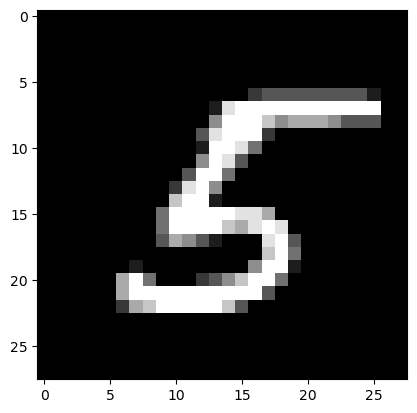

Prediction: [4]
Label: 8


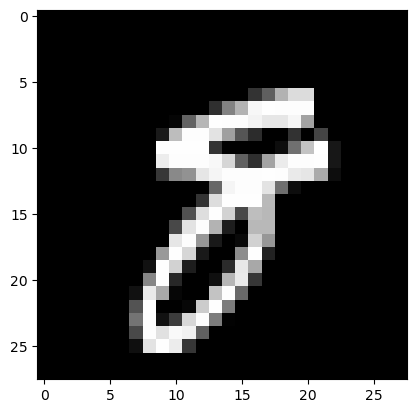

Prediction: [3]
Label: 3


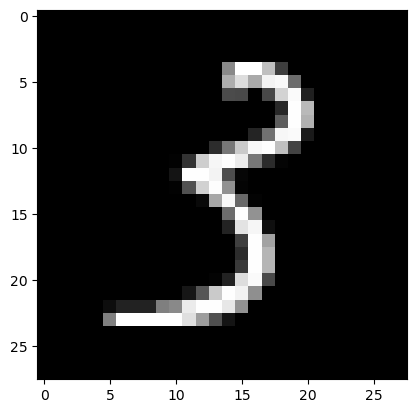

Prediction: [4]
Label: 9


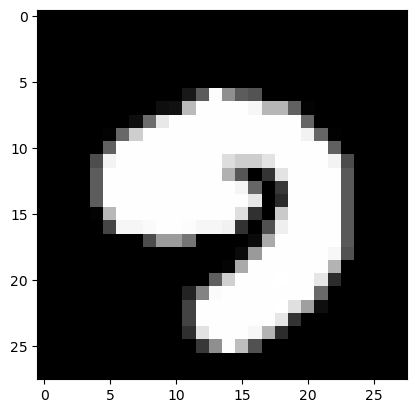

In [10]:
test_prediction(0,W1,b1,W2,b2)
test_prediction(1,W1,b1,W2,b2)
test_prediction(2,W1,b1,W2,b2)
test_prediction(3,W1,b1,W2,b2)

In [12]:
dev_predictions = make_predictions(X_dev,W1,b1,W2,b2)
get_accuracy(dev_predictions,Y_dev)

[1 7 0 1 4 7 6 4 3 6 2 0 0 4 5 5 4 3 6 4 4 0 4 4 6 2 2 5 0 5 2 7 3 6 1 1 3
 6 7 6 5 4 3 4 4 6 1 1 0 4 8 1 4 3 6 4 5 4 7 4 1 1 1 0 4 5 3 4 7 4 0 4 4 4
 1 4 5 4 4 3 4 4 1 7 4 4 4 4 2 4 3 6 5 6 4 6 1 4 5 5 4 4 5 1 2 0 4 4 4 4 6
 0 0 5 3 6 1 2 5 4 4 3 5 0 4 6 4 4 0 3 2 6 0 4 7 6 4 3 4 1 7 6 5 2 2 1 4 6
 3 2 7 0 0 5 7 4 5 3 5 7 4 0 2 6 4 2 1 5 4 2 1 1 4 1 0 3 3 5 5 4 6 4 0 4 4
 4 6 3 0 3 0 4 0 4 6 4 2 5 6 1 7 4 3 4 7 4 5 3 4 4 5 5 6 4 6 5 3 1 0 6 4 4
 5 7 4 5 3 5 0 7 2 3 4 4 6 4 3 4 1 4 0 7 1 7 7 3 4 4 2 4 2 4 1 3 0 7 7 2 2
 0 4 2 1 5 6 3 1 1 7 3 0 3 3 6 0 4 3 0 6 7 4 5 7 3 0 5 5 3 4 6 4 7 4 3 0 4
 5 1 4 4 0 2 2 4 6 6 4 4 6 0 0 3 7 4 5 4 5 2 6 3 0 4 5 4 6 2 7 4 4 0 4 3 0
 4 4 4 0 5 4 4 4 1 3 5 4 4 4 4 7 4 5 0 4 2 1 2 4 4 3 4 4 0 5 0 4 3 4 4 2 4
 5 2 4 6 1 4 4 4 4 2 7 7 5 3 4 4 3 5 3 5 3 1 1 4 2 7 0 0 4 0 5 4 3 5 7 4 5
 5 7 1 4 3 1 4 6 0 4 4 3 3 0 4 1 4 3 4 1 4 6 4 7 4 4 4 1 4 3 1 2 1 4 4 3 4
 5 4 5 4 6 5 4 5 4 4 6 5 5 5 4 4 4 5 4 1 4 1 1 1 7 4 4 3 0 7 4 0 4 0 0 4 5
 7 4 2 4 6 1 4 1 4 2 4 2 

0.695